In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.datasets.loaders import load_nfl
import seaborn as sns

In [2]:
df = pd.read_csv('modelDataset.csv')

In [3]:
df.head()


,Id,Frequency,Recency,Lifetime,MonetaryValue
0,13748.0,5,3629,3907,948.25
1,15100.0,6,3864,3907,635.10
2,16098.0,7,3621,3907,2005.63
3,17420.0,3,3584,3907,598.83
4,16250.0,2,3795,3907,389.44


In [4]:
df.mean()

Id               15327.310092
Frequency            3.129409
Recency           3625.300868
Lifetime          3739.379544
MonetaryValue      825.608045
dtype: float64

In [5]:
df.std()

Id               1702.364652
Frequency           2.398398
Recency            91.009757
Lifetime          115.572677
MonetaryValue     764.110200
dtype: float64

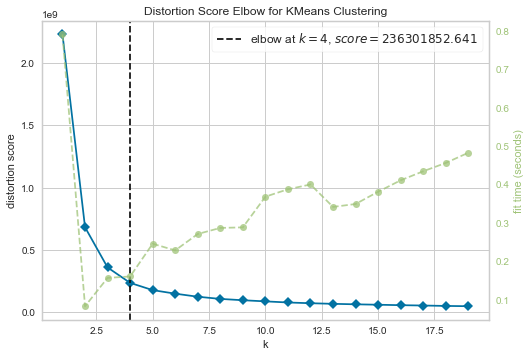

C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=19, random_state=10), k=None)

In [6]:
kelbow_visualizer(KMeans(random_state=10), df.loc[:, df.columns != 'Id'], k=(1,20))

Let's just normalize data. And let's see if data is skewed, and after dealing with that

C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

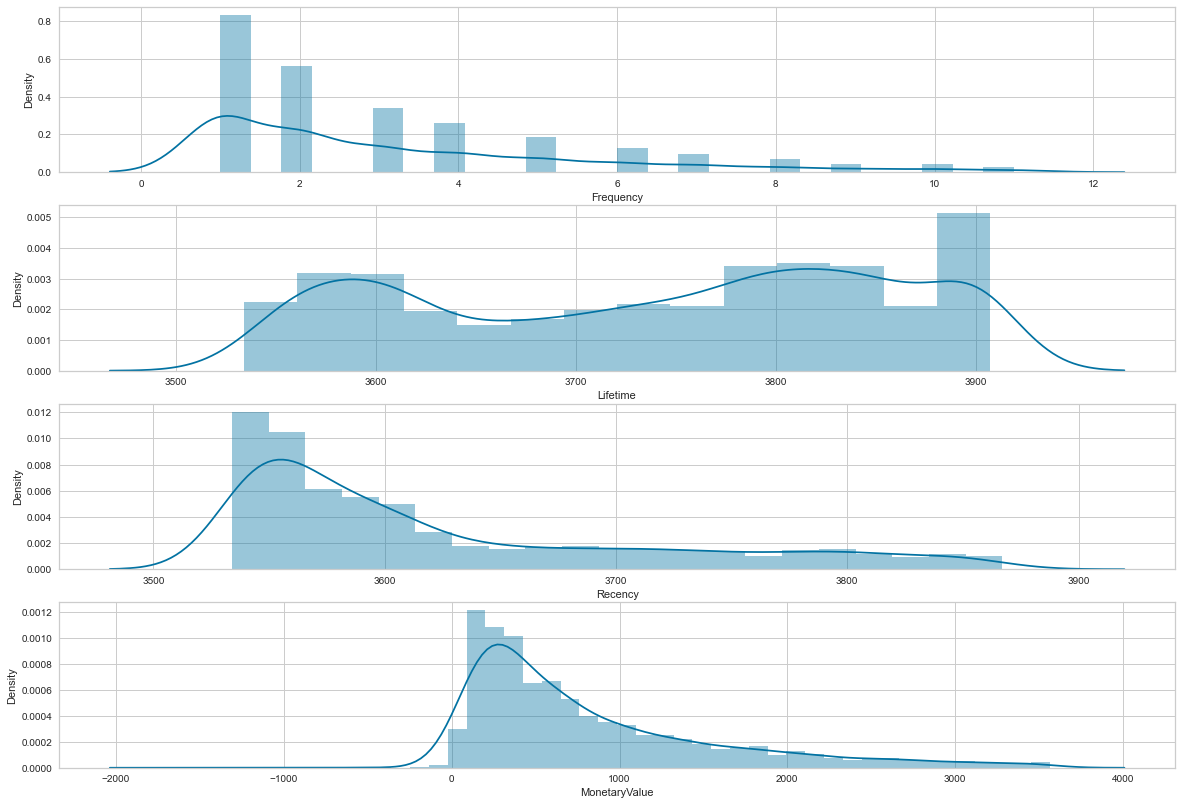

In [7]:

plt.figure(figsize=(20,14))

plt.subplot(4, 1, 1); sns.distplot(df['Frequency'])
plt.subplot(4, 1, 2); sns.distplot(df['Lifetime'])
plt.subplot(4, 1, 3); sns.distplot(df['Recency'])
plt.subplot(4, 1, 4); sns.distplot(df['MonetaryValue'])

plt.show()

In [8]:
df['MonetaryValue'] = df['MonetaryValue'] + 0.011 #someone can generate 0 revenue

frequencyLog = np.log(df['Frequency'])
lifetimeLog = np.log(df['Lifetime'])
recencyLog = np.log(df['Recency'])
monetaryValueLog = np.log(df['MonetaryValue'])


C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Faris Hambo\miniconda3\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figur

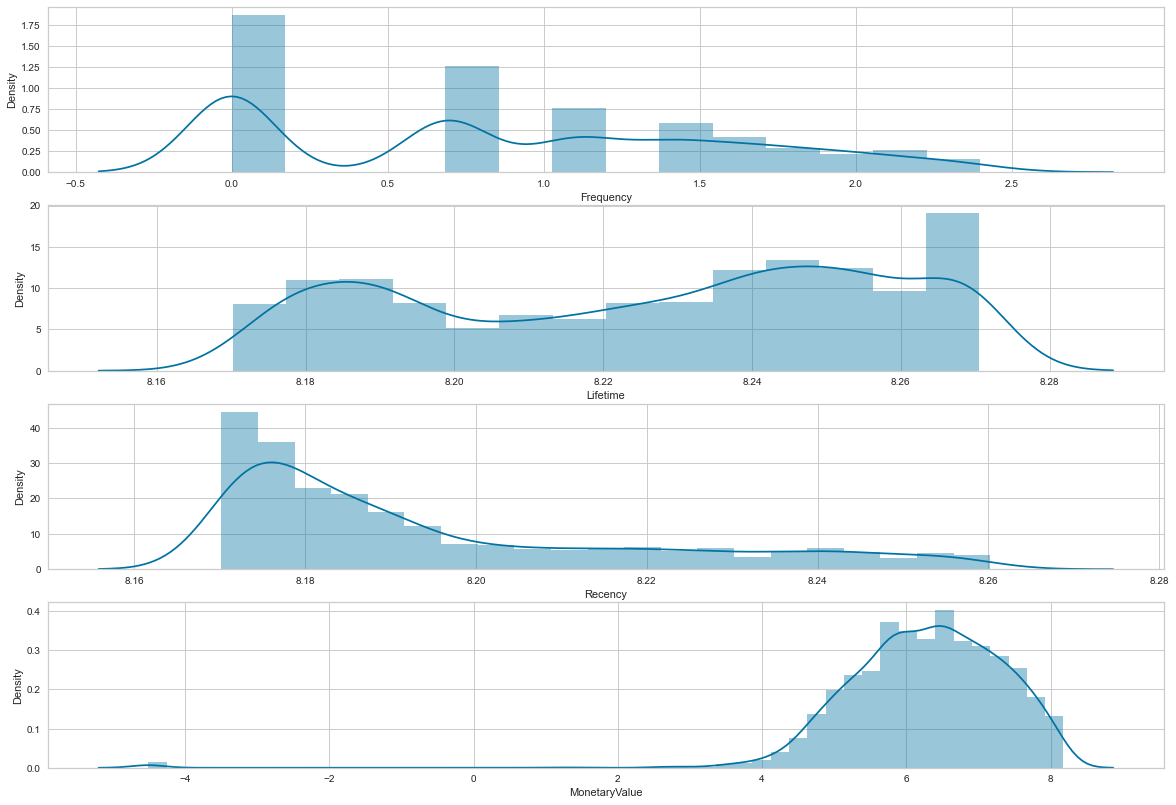

In [9]:

plt.figure(figsize=(20,14))

plt.subplot(4, 1, 1); sns.distplot(frequencyLog)
plt.subplot(4, 1, 2); sns.distplot(lifetimeLog)
plt.subplot(4, 1, 3); sns.distplot(recencyLog)
plt.subplot(4, 1, 4); sns.distplot(monetaryValueLog)

plt.show()

In [10]:
df = df - df.mean()
df = df / df.std()

In [11]:
df.describe()

,Id,Frequency,Recency,Lifetime,MonetaryValue
count,3.686000e+03,3.686000e+03,3.686000e+03,3686.000000,3.686000e+03
mean,-3.334886e-16,-3.084288e-17,-1.233715e-16,0.000000,9.252863e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00
min,-1.751276e+00,-8.878462e-01,-1.003199e+00,-1.777060,-3.164593e+00
25%,-8.639806e-01,-8.878462e-01,-7.724542e-01,-1.024287,-7.251514e-01
50%,7.454283e-03,-4.709012e-01,-3.878800e-01,0.169767,-3.339545e-01
75%,8.608261e-01,3.629887e-01,5.900371e-01,0.861972,4.105291e-01
max,1.738576e+00,3.281604e+00,2.655750e+00,1.450347,3.583569e+00


In [12]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=4, init='random',
    n_init=20, max_iter=500, 
    tol=1e-04, random_state=20
)

In [13]:
KmeansDf = df.loc[:, df.columns != 'Id']
KmeansDf.head()

,Frequency,Recency,Lifetime,MonetaryValue
0,0.779934,0.040645,1.450347,0.160503
1,1.196879,2.622786,1.450347,-0.249320
2,1.613824,-0.047257,1.450347,1.544309
3,-0.053956,-0.453807,1.450347,-0.296787
4,-0.470901,1.864626,1.450347,-0.570818


In [14]:
km.fit(KmeansDf.to_numpy())

KMeans(init='random', max_iter=500, n_clusters=4, n_init=20, random_state=20)

In [15]:
km.predict(KmeansDf)

array([1, 3, 0, ..., 2, 2, 2])

In [16]:
print(km.predict([[1,1,1,1]]))

[1]


In [17]:
labels = km.labels_
print(labels)

[1 3 0 ... 2 2 2]


In [18]:
df = pd.read_csv('modelDataset.csv')
expanded_df = df.assign(Cluster = labels)
expanded_df.head()

,Id,Frequency,Recency,Lifetime,MonetaryValue,Cluster
0,13748.0,5,3629,3907,948.25,1
1,15100.0,6,3864,3907,635.10,3
2,16098.0,7,3621,3907,2005.63,0
3,17420.0,3,3584,3907,598.83,1
4,16250.0,2,3795,3907,389.44,3


In [19]:
expanded_df.groupby(['Cluster']).agg({'Recency': 'mean','Frequency': 'mean','MonetaryValue': 'mean','Lifetime': ['mean', 'count']}).round(0)

Recency Frequency MonetaryValue Lifetime      
           mean      mean          mean     mean count
Cluster                                               
0        3569.0       7.0        2158.0   3815.0   615
1        3588.0       4.0         842.0   3814.0   952
2        3583.0       2.0         469.0   3605.0  1259
3        3770.0       2.0         376.0   3800.0   860

In [21]:
import onnxruntime as rt
import numpy
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

session = rt.InferenceSession('km_user.onnx')
session.get_modelmeta()


In [22]:
def predict_with_onnxruntime(onx, X):
    sess = rt.InferenceSession(onx.SerializeToString())
    input_name = sess.get_inputs()[0].name
    res = sess.run(None, {input_name: X.astype(np.float32)})
    return res[0]

onx = convert_sklearn(km, initial_types=[('KmeansDf', FloatTensorType((None, KmeansDf.to_numpy().shape[1])))])
print(predict_with_onnxruntime(onx, KmeansDf.to_numpy()))

[1 3 0 ... 2 2 2]
